Task 1.

In [83]:
import json
import glob
import os
import csv
import numpy as np
import pandas as pd
import sys
import codecs
from copy import deepcopy
from collections import OrderedDict

In [84]:
os.chdir('/Users/[editted]/Documents/indeed_scraped_data/job_url_data')

In [85]:
url_date = ["5172022", "5182022", "5192022", "5202022", "5212022", "5222022", "5232022"]
job_url = pd.DataFrame()
data_path = "/Users/[editted]/Documents/indeed_scraped_data/job_url_data"
for d in url_date:
    for csvfile in os.listdir("/Users/[editted]/Documents/indeed_scraped_data/job_url_data"):
        if csvfile.startswith("job_urls_for_parsehub_" + d):
            url_df = pd.read_csv(data_path + "/" + csvfile)
            date_url = [d for _ in range(len(url_df))]
            url_df["date"] = date_url 
            job_url = pd.concat([job_url, url_df])
job_url = job_url.reset_index()
del job_url["index"]

In [86]:
print (job_url)

                                                 job_url     date
0      https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...  5172022
1      https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...  5172022
2      https://www.indeed.com/rc/clk?jk=ceee36181304b...  5172022
3      https://www.indeed.com/rc/clk?jk=e9735aea38be9...  5172022
4      https://www.indeed.com/company/Swiss-American-...  5172022
...                                                  ...      ...
60976  https://www.indeed.com/rc/clk?jk=c239f8c996a77...  5232022
60977  https://www.indeed.com/rc/clk?jk=a8944c2603abb...  5232022
60978  https://www.indeed.com/company/Summit-Healthca...  5232022
60979  https://www.indeed.com/company/StyleRemains-Gm...  5232022
60980  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...  5232022

[60981 rows x 2 columns]


In [87]:
job_url_df = job_url.drop_duplicates(subset = ['job_url'])
print(job_url_df)

                                                 job_url     date
0      https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...  5172022
1      https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...  5172022
2      https://www.indeed.com/rc/clk?jk=ceee36181304b...  5172022
3      https://www.indeed.com/rc/clk?jk=e9735aea38be9...  5172022
4      https://www.indeed.com/company/Swiss-American-...  5172022
...                                                  ...      ...
55707  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...  5232022
55708  https://www.indeed.com/rc/clk?jk=4c78c7807e27e...  5232022
55711  https://www.indeed.com/rc/clk?jk=0e8f96a6be975...  5232022
55712  https://www.indeed.com/rc/clk?jk=bd10340c8c24a...  5232022
55713  https://www.indeed.com/rc/clk?jk=0b6d28437ec8a...  5232022

[21260 rows x 2 columns]


In [90]:
job_url_dict = dict(zip(job_url_df['job_url'], job_url_df['date']))
job_url_dict

{'https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CdTBpsLrhs4IwmIsoO0brdHaF9POTtXIeJjdlamKYQ_DT3Xi384CrT0Jdu3akJ_FTvtL7O6E4sug8HmzI4GEF00uU-3h7L_KTR41_hBjyuQSj2IoT2QzG2hLIQD9zpNozQd18Pq4NJg9r4xDBDQ3gGtKza1ngF--PYmCgnpTI0EffTrxLgMidcilerHRtCoSQMUneQlLLU9E8vj8nhNDdXwzf3eDERgJBWPP-cMNznzVfp5SO02qMCJTLIBNWPfmsulGJCoi6BYEBK8-q5QYu-Q0b_nWVI9-bJEIfCNB6VWH8d-4UBc-46D6pmQe0kfLbKUfU4WozmQQvg0s0b4ac5oIKTTVcQULTN3zNzhGn_jbeO_0r7H07aIIdqcapx3b82KueDUzOaZgZF7PjR-aid_cNYqzhM-g3M8Y_q7yDqgPumkUjdvGymUEglMQ5Pb1c=&p=2&fvj=0&vjs=3': '5172022',
 'https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608d56&fccid=dc76b1719ffc5b77&vjs=3': '5172022',
 'https://www.indeed.com/rc/clk?jk=ceee36181304b611&fccid=ff65a70862921ed7&vjs=3': '5172022',
 'https://www.indeed.com/rc/clk?jk=e9735aea38be9775&fccid=de56d7554bea5214&vjs=3': '5172022',
 'https://www.indeed.com/company/Swiss-American-CDMO/jobs/Quality-Assurance-Engineer-70a8620978a93173?fccid=ba875992324efa7b&vjs=3': '5172022',
 'https://www.indeed.com/rc/clk?jk=acc18

In [91]:
job_url_json = json.dumps(job_url_dict, indent = 4)
job_url_json

'{\n    "https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0CdTBpsLrhs4IwmIsoO0brdHaF9POTtXIeJjdlamKYQ_DT3Xi384CrT0Jdu3akJ_FTvtL7O6E4sug8HmzI4GEF00uU-3h7L_KTR41_hBjyuQSj2IoT2QzG2hLIQD9zpNozQd18Pq4NJg9r4xDBDQ3gGtKza1ngF--PYmCgnpTI0EffTrxLgMidcilerHRtCoSQMUneQlLLU9E8vj8nhNDdXwzf3eDERgJBWPP-cMNznzVfp5SO02qMCJTLIBNWPfmsulGJCoi6BYEBK8-q5QYu-Q0b_nWVI9-bJEIfCNB6VWH8d-4UBc-46D6pmQe0kfLbKUfU4WozmQQvg0s0b4ac5oIKTTVcQULTN3zNzhGn_jbeO_0r7H07aIIdqcapx3b82KueDUzOaZgZF7PjR-aid_cNYqzhM-g3M8Y_q7yDqgPumkUjdvGymUEglMQ5Pb1c=&p=2&fvj=0&vjs=3": "5172022",\n    "https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608d56&fccid=dc76b1719ffc5b77&vjs=3": "5172022",\n    "https://www.indeed.com/rc/clk?jk=ceee36181304b611&fccid=ff65a70862921ed7&vjs=3": "5172022",\n    "https://www.indeed.com/rc/clk?jk=e9735aea38be9775&fccid=de56d7554bea5214&vjs=3": "5172022",\n    "https://www.indeed.com/company/Swiss-American-CDMO/jobs/Quality-Assurance-Engineer-70a8620978a93173?fccid=ba875992324efa7b&vjs=3": "5172022",\n    "https://www

In [92]:
job_url_df.to_csv('cleaned_url.csv', index=False)
reader = csv.reader(open('cleaned_url.csv', 'r'))
d= {}
for row in reader:
 job_url, date = row
 d[job_url] = date
with open('job_url.json', 'w') as f:
    json.dump(d, f)

There are 21260 unique jobs have been collected between May 17, 2022 and May 23, 2022. 

Task 2. 

In [64]:
os.chdir('/Users/[editted]/Documents/indeed_scraped_data/job_info_data')

In [65]:
info_date = ["5172022", "5182022", "5192022", "5202022", "5212022", "5222022", "5232022"]
job_info = pd.DataFrame()
data_path = "/Users/[editted]/Documents/indeed_scraped_data/job_info_data"
for d in info_date:
    for csvfile in os.listdir("/Users/[editted]/Documents/indeed_scraped_data/job_info_data"):
        if csvfile.startswith("parsehub_" + d) and csvfile.endswith(".csv"):
            info_df = pd.read_csv(data_path + "/" + csvfile)
            date_info = [d for _ in range(len(info_df))]
            job_info = pd.concat([job_info, info_df])
job_info = job_info.reset_index()
del job_info["index"]

In [68]:
print(job_info)

                                               lnks_link  \
0      https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
1      https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...   
2      https://www.indeed.com/rc/clk?jk=ceee36181304b...   
3      https://www.indeed.com/rc/clk?jk=e9735aea38be9...   
4      https://www.indeed.com/company/Swiss-American-...   
...                                                  ...   
35194  https://www.indeed.com/rc/clk?jk=019e3da349970...   
35196  https://www.indeed.com/rc/clk?jk=315e7cf866cab...   
35197  https://www.indeed.com/rc/clk?jk=81503395a0221...   
35198  https://www.indeed.com/rc/clk?jk=6b8d48e17cdb5...   
35199  https://www.indeed.com/rc/clk?jk=b10cc9c757d57...   

                                          lnks_job_title  \
0              Senior Audit Manager- Compliance (Remote)   
1                                      Access Specialist   
2         Clinic Registered Nurse - Family Practice - FT   
3             Sr Wetland Scientist/Perm

In [69]:
job_info = job_info.dropna(subset = ['lnks_job_title', 'lnks_job_description'])
job_info

lnks_link  \
0      https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
1      https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...   
2      https://www.indeed.com/rc/clk?jk=ceee36181304b...   
3      https://www.indeed.com/rc/clk?jk=e9735aea38be9...   
4      https://www.indeed.com/company/Swiss-American-...   
...                                                  ...   
35194  https://www.indeed.com/rc/clk?jk=019e3da349970...   
35196  https://www.indeed.com/rc/clk?jk=315e7cf866cab...   
35197  https://www.indeed.com/rc/clk?jk=81503395a0221...   
35198  https://www.indeed.com/rc/clk?jk=6b8d48e17cdb5...   
35199  https://www.indeed.com/rc/clk?jk=b10cc9c757d57...   

                                          lnks_job_title  \
0              Senior Audit Manager- Compliance (Remote)   
1                                      Access Specialist   
2         Clinic Registered Nurse - Family Practice - FT   
3             Sr Wetland Scientist/Permitting Specialist   
4                             Quality Assurance Engineer   
...                                                  ...   
35194  Risk & Regulatory Business Process, Controls, ...   
35196                              Healthcare Specialist   
35197                       BUSINESS MANAGER (FINANCIAL)   
35198                      Dialysis Equipment Technician   
35199                                  Clinical Engineer   

                           lnks_company  \
0                                  USAA   
1          Pikes Peak Community College   
2              Memorial Regional Health   
3                                Jacobs   
4                   Swiss American CDMO   
...                                 ...   
35194          PRICE WATERHOUSE COOPERS   
35196                    Stericycle Inc   
35197  US Commander, Navy Installations   
35198            Fresenius Medical Care   
35199                 Kaiser Permanente   

                                        lnks_company_url  \
0      https://www.indeed.com/cmp/Usaa?campaignid=mob...   
1      https://www.indeed.com/cmp/Pikes-Peak-Communit...   
2      https://www.indeed.com/cmp/Memorial-Regional-H...   
3      https://www.indeed.com/cmp/Jacobs?campaignid=m...   
4      https://www.indeed.com/cmp/Swiss-American-Cdmo...   
...                                                  ...   
35194  https://www.indeed.com/cmp/Pwc?campaignid=mobv...   
35196  https://www.indeed.com/cmp/Stericycle?campaign...   
35197  https://www.indeed.com/cmp/US-Commander,-Navy-...   
35198  https://www.indeed.com/cmp/Fresenius-Medical-C...   
35199  https://www.indeed.com/cmp/Kaiser-Permanente?c...   

            lnks_company_location  \
0          Happy Valley Ranch, AZ   
1      Colorado Springs, CO 80906   
2                 Craig, CO 81625   
3          Wethersfield, CT 06109   
4            Carrollton, TX 75006   
...                           ...   
35194         Las Vegas, NV 89169   
35196              Charleston, SC   
35197                Gulfport, MS   
35198            Denver, CO 80238   
35199                Berkeley, CA   

                                    lnks_job_description  
0      Purpose of Job We are seeking a talented Senio...  
1      Tracking Code: 40069\nWork Type: Full-time\nCa...  
2      Position Purpose: The Registered Nurse is resp...  
3      Our People & Places Solutions business – reinf...  
4      QUALITY ASSURANCE ENGINEER II\nPosition Summar...  
...                                                  ...  
35194  A career within Internal Audit services, will ...  
35196  About Us:\nWould you like to have a career tha...  
35197  Duties\nApplies financial oversight for NAF fu...  
35198  PURPOSE AND SCOPE:\nEntry level position focus...  
35199  Assures that Kaiser Permanente acquires clinic...  

[17704 rows x 6 columns]

In [70]:
os.chdir('/Users/[editted]/Documents/indeed_scraped_data/job_info_data')

In [71]:
with open ('parsehub_5182022_v2.json') as f0:
    info518=json.load(f0)
json518 = pd.json_normalize(info518, record_path =['lnks'])  
json518.rename(columns={'link': 'lnks_link', 'job_title': 'lnks_job_title', 'company': 'lnks_company', 'company_url': 'lnks_company_url', 'company_location': 'lnks_company_location', 'job_description': 'lnks_job_description'}, inplace=True)
print(json518)   
json518=json518.dropna(subset=['lnks_job_title', 'lnks_job_description'])
  
with open ('parsehub_5202022_v2.json') as f1:
    info520=json.load(f1)
json520 = pd.json_normalize(info520, record_path =['lnks'])  
json520.rename(columns={'link': 'lnks_link', 'job_title': 'lnks_job_title', 'company': 'lnks_company', 'company_url': 'lnks_company_url', 'company_location': 'lnks_company_location', 'job_description': 'lnks_job_description'}, inplace=True)
print(json520)   
json520=json520.dropna(subset=['lnks_job_title', 'lnks_job_description'])

                                              lnks_link lnks_job_title  \
0     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...            NaN   
1     https://www.indeed.com/rc/clk?jk=a95cd2409de80...            NaN   
2     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...            NaN   
3     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...            NaN   
4     https://www.indeed.com/rc/clk?jk=df119ccd5529f...            NaN   
...                                                 ...            ...   
2829  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...            NaN   
2830  https://www.indeed.com/rc/clk?jk=1f33f849232cd...            NaN   
2831  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...            NaN   
2832  https://www.indeed.com/rc/clk?jk=59fd09bfb03f4...            NaN   
2833                                                               NaN   

     lnks_company lnks_company_url lnks_company_location lnks_job_description  
0             NaN              

In [72]:
jobinfo=pd.concat([json518, json520, job_info])

cleaned_jobinfo=jobinfo.drop_duplicates(subset=['lnks_link'])

print(cleaned_jobinfo.shape)

(16303, 6)


In [73]:
cleaned_jobinfo.to_csv('cleaned_jobinfo.csv', index=False)

From the data shown above, we are able to conclude the fact that there 16303 unique jobs in the cleaned data. 

Task 3. 

In [98]:
combined_df = job_url_df.merge(cleaned_jobinfo, how = 'left', left_on = 'job_url', right_on = 'lnks_link')
combined_df['NaN_value'] = combined_df['lnks_link'].isna()
print(combined_df['NaN_value'].describe())

count     21260
unique        2
top       False
freq      16303
Name: NaN_value, dtype: object


In [99]:
combined_df

job_url     date  \
0      https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...  5172022   
1      https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...  5172022   
2      https://www.indeed.com/rc/clk?jk=ceee36181304b...  5172022   
3      https://www.indeed.com/rc/clk?jk=e9735aea38be9...  5172022   
4      https://www.indeed.com/company/Swiss-American-...  5172022   
...                                                  ...      ...   
21255  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...  5232022   
21256  https://www.indeed.com/rc/clk?jk=4c78c7807e27e...  5232022   
21257  https://www.indeed.com/rc/clk?jk=0e8f96a6be975...  5232022   
21258  https://www.indeed.com/rc/clk?jk=bd10340c8c24a...  5232022   
21259  https://www.indeed.com/rc/clk?jk=0b6d28437ec8a...  5232022   

                                               lnks_link  \
0      https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
1      https://www.indeed.com/rc/clk?jk=bf3aa4d4d8608...   
2      https://www.indeed.com/rc/clk?jk=ceee36181304b...   
3      https://www.indeed.com/rc/clk?jk=e9735aea38be9...   
4      https://www.indeed.com/company/Swiss-American-...   
...                                                  ...   
21255                                                NaN   
21256                                                NaN   
21257                                                NaN   
21258                                                NaN   
21259                                                NaN   

                                       lnks_job_title  \
0           Senior Audit Manager- Compliance (Remote)   
1                                   Access Specialist   
2      Clinic Registered Nurse - Family Practice - FT   
3          Sr Wetland Scientist/Permitting Specialist   
4                          Quality Assurance Engineer   
...                                               ...   
21255                                             NaN   
21256                                             NaN   
21257                                             NaN   
21258                                             NaN   
21259                                             NaN   

                       lnks_company  \
0                              USAA   
1      Pikes Peak Community College   
2          Memorial Regional Health   
3                            Jacobs   
4               Swiss American CDMO   
...                             ...   
21255                           NaN   
21256                           NaN   
21257                           NaN   
21258                           NaN   
21259                           NaN   

                                        lnks_company_url  \
0      https://www.indeed.com/cmp/Usaa?campaignid=mob...   
1      https://www.indeed.com/cmp/Pikes-Peak-Communit...   
2      https://www.indeed.com/cmp/Memorial-Regional-H...   
3      https://www.indeed.com/cmp/Jacobs?campaignid=m...   
4      https://www.indeed.com/cmp/Swiss-American-Cdmo...   
...                                                  ...   
21255                                                NaN   
21256                                                NaN   
21257                                                NaN   
21258                                                NaN   
21259                                                NaN   

            lnks_company_location  \
0          Happy Valley Ranch, AZ   
1      Colorado Springs, CO 80906   
2                 Craig, CO 81625   
3          Wethersfield, CT 06109   
4            Carrollton, TX 75006   
...                           ...   
21255                         NaN   
21256                         NaN   
21257                         NaN   
21258                         NaN   
21259                         NaN   

                                    lnks_job_description  NaN_value  
0      Purpose of Job We are seeking a talented Senio...      False  
1      Tracking Code: 40069\nWork Type:

In [100]:
16303/21260

0.7668391345249295

From the result shown above, we can say that about 76.68% of jobs can be matched. 

In [106]:
missing_date = combined_df.groupby(['date','NaN_value']).agg({'job_url': 'count'}).reset_index()
missing_date

date  NaN_value  job_url
0   5172022      False     3905
1   5172022       True     1352
2   5182022      False     1324
3   5182022       True        1
4   5192022      False     3790
5   5192022       True        8
6   5202022      False     4503
7   5202022       True       20
8   5212022      False     2113
9   5212022       True       41
10  5222022      False      668
11  5222022       True      112
12  5232022       True     3423

In [110]:
import seaborn as sns

<AxesSubplot:xlabel='date', ylabel='job_url'>

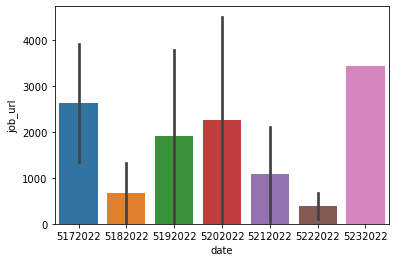

In [111]:
sns.barplot(x = 'date', y = 'job_url', data = missing_date)

In [112]:
complete_date = combined_df.dropna()

In [113]:
complete_date = complete_date.groupby(['date']).agg({'job_url': 'count'}).reset_index()
complete_date

date  job_url
0  5172022     3253
1  5182022     1243
2  5192022     3359
3  5202022     4181
4  5212022     1741
5  5222022      519

From 0517 to 0523, the number of collected complete jobs is out of proportion, so I reckon that the original data quality has some issues. In all the steps and results shown above, we can see that parts of the data are not usable, and the distribution is not normal either. There are many reasons within it, and we are unable to control the social contexts. 0522 was a sunday, so it might be one of the reasons that the collected data was not good. In the future, we can improve our data organiztion, data collection and regularly cleaning data to ameliorate our dataset. 

Bonus

In [ ]:
import os
import geopandas as gpd
import pandas as pd
import geopandas as gpd
import folium

In [ ]:
os.chdir('/Users/[editted]/Documents/states')

In [ ]:
combined_df = job_url_df.merge(cleaned_jobinfo, how = 'left', left_on = 'job_url', right_on = 'lnks_link')
combined_df['NaN_value'] = combined_df['lnks_link'].isna()
print(combined_df['NaN_value'].describe())
job_location = combined_df.groupby(['job_url','NaN_value']).agg({'company_location'}).reset_index()
job_gdf = gpd.GeoDataFrame(complete_date, geometry = gpd.points_from_state('company_location'))